In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
x = np.linspace(0,5,11)

# Colores y estilos
[Documentacion Specifying Colors](https://matplotlib.org/3.5.1/tutorials/colors/colors.html)

In [99]:
# print(plt.style.available)

In [100]:
styles = np.copy(plt.style.available)
for i in range(0,len(styles)):
    print(styles[i])

Solarize_Light2
_classic_test_patch
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


## Modificaciones de Estilos Matlab

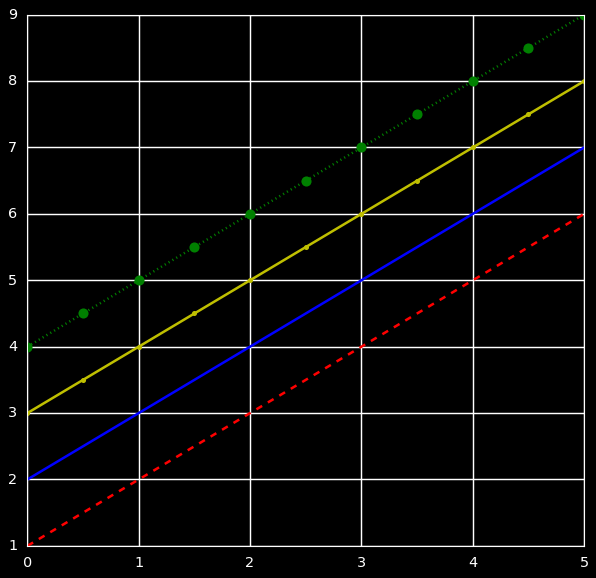

In [101]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, x+1, 'r--')
ax.plot(x, x+2, 'b-')
ax.plot(x, x+3, 'y.-')
ax.plot(x, x+4, 'go:')

fig.show()

## Modificaciones de Estilos Pyplot

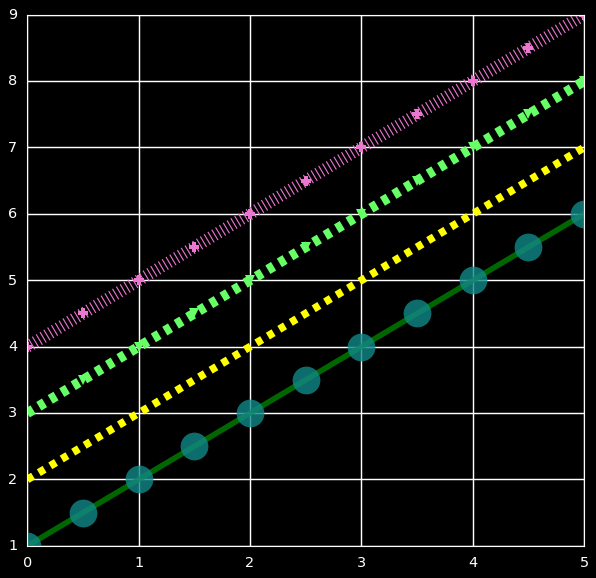

In [102]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, x+1, color='green', alpha=0.8, linewidth=5, linestyle='-', marker='o', markersize=25, markerfacecolor='#188')
ax.plot(x, x+2, color='yellow', linewidth=7, linestyle='--', marker='x')
ax.plot(x, x+3, color='#66FF66', linewidth=9, linestyle='dashed', marker='v')
ax.plot(x, x+4, color='#eb77d0', linewidth=11, linestyle=':', marker='P')

fig.show()

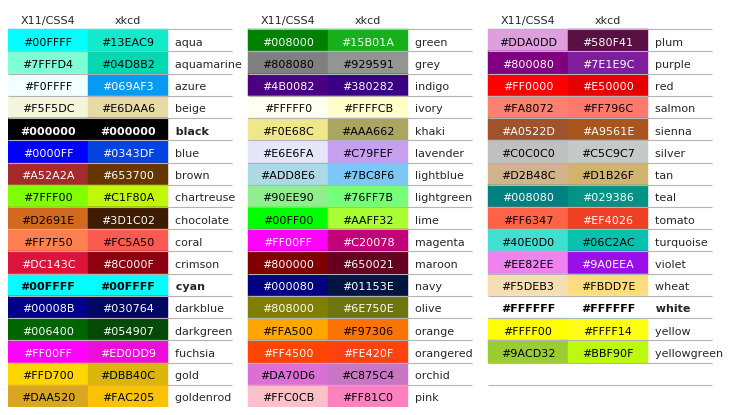

In [109]:
# Lista de colores

import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

fig = plt.figure(figsize=[9, 5])
ax = fig.add_axes([0, 0, 1, 1])

n_groups = 3
n_rows = len(overlap) // n_groups + 1

for j, color_name in enumerate(sorted(overlap)):
    css4 = mcolors.CSS4_COLORS[color_name]
    xkcd = mcolors.XKCD_COLORS[f'xkcd:{color_name}'].upper()

    # Pick text colour based on perceived luminance.
    rgba = mcolors.to_rgba_array([css4, xkcd])
    luma = 0.299 * rgba[:, 0] + 0.587 * rgba[:, 1] + 0.114 * rgba[:, 2]
    css4_text_color = 'k' if luma[0] > 0.5 else 'w'
    xkcd_text_color = 'k' if luma[1] > 0.5 else 'w'

    col_shift = (j // n_rows) * 3
    y_pos = j % n_rows
    text_args = dict(fontsize=10, weight='bold' if css4 == xkcd else None)
    ax.add_patch(mpatch.Rectangle((0 + col_shift, y_pos), 1, 1, color=css4))
    ax.add_patch(mpatch.Rectangle((1 + col_shift, y_pos), 1, 1, color=xkcd))
    ax.text(0.5 + col_shift, y_pos + .7, css4,
            color=css4_text_color, ha='center', **text_args)
    ax.text(1.5 + col_shift, y_pos + .7, xkcd,
            color=xkcd_text_color, ha='center', **text_args)
    ax.text(2 + col_shift, y_pos + .7, f'  {color_name}', **text_args)

for g in range(n_groups):
    ax.hlines(range(n_rows), 3*g, 3*g + 2.8, color='0.7', linewidth=1)
    ax.text(0.5 + 3*g, -0.3, 'X11/CSS4', ha='center')
    ax.text(1.5 + 3*g, -0.3, 'xkcd', ha='center')

ax.set_xlim(0, 3 * n_groups)
ax.set_ylim(n_rows, -1)
ax.axis('off')

plt.show()
